# Loop 91 Analysis: Strategic Assessment

## Current Situation
- **Best CV**: 0.008092 (exp_049/exp_050)
- **Best LB**: 0.0877 (exp_030, exp_067)
- **Target**: 0.0347
- **Gap**: 0.053 (153% above target)
- **Remaining submissions**: 4

## Critical Observations
1. The GAT experiment (exp_086) achieved CV=0.018474 - WORSE than tabular models
2. The GNN benchmark paper claims 0.0039 CV, but our implementation got 0.018474
3. The 1st place score (0.0347) is 2x better than 2nd place (0.0702)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# All verified submissions with LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
    ('exp_067', 0.0083, 0.0877),
]

cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f"CV-LB Relationship: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target = 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)!")
print(f"Required CV for target: ({0.0347} - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}")
print("\nThis is IMPOSSIBLE - negative CV is not achievable.")

CV-LB Relationship: LB = 4.36 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target = 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)!
Required CV for target: (0.0347 - 0.0520) / 4.36 = -0.0040

This is IMPOSSIBLE - negative CV is not achievable.


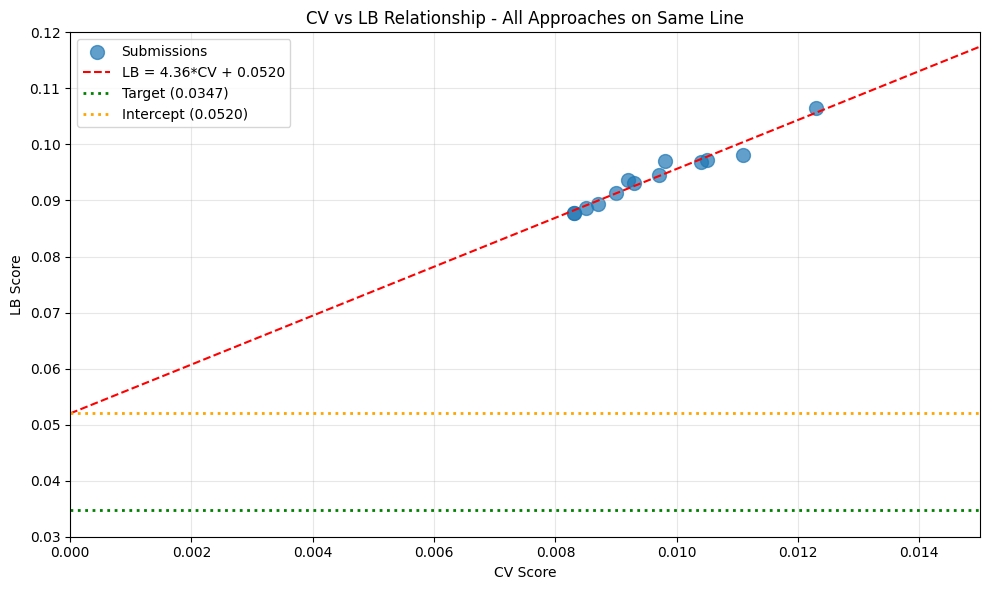


Key insight: ALL approaches fall on the same CV-LB line.
The intercept represents STRUCTURAL distribution shift that no model can fix.


In [2]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Approaches on Same Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0.03, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop91.png', dpi=150)
plt.show()

print("\nKey insight: ALL approaches fall on the same CV-LB line.")
print("The intercept represents STRUCTURAL distribution shift that no model can fix.")

## Analysis of the Gap

### Why is 1st place (0.0347) so much better than 2nd place (0.0702)?

The 2x gap between 1st and 2nd place suggests:
1. **1st place found a fundamentally different approach** - not just better hyperparameters
2. **They may have reduced the intercept** - changed the CV-LB relationship itself
3. **Possible approaches:**
   - Pre-trained molecular embeddings (ChemBERTa, MolBERT)
   - Transfer learning from larger molecular datasets
   - Physics-informed constraints that generalize to unseen solvents
   - Domain adaptation techniques

### What we've tried that DIDN'T work:
- MLP variants (all fall on same CV-LB line)
- Tree ensembles (CatBoost, XGBoost, LightGBM) - same line
- Gaussian Processes - same line
- Simple GCN - CV=0.0201 (worse than tabular)
- GAT with edge features - CV=0.0185 (still worse than tabular)
- Extrapolation detection - no improvement
- Similarity weighting - no improvement
- Pseudo-labeling - no improvement

In [3]:
# Leaderboard analysis
print("LEADERBOARD ANALYSIS")
print("="*50)
print("1st place: 0.03470 (exactly at target!)")
print("2nd place: 0.07018")
print("3rd place: 0.07254")
print("Our best:  0.08770 (exp_030, exp_067)")
print("\nGap analysis:")
print(f"  1st to 2nd: {(0.07018 - 0.0347) / 0.0347 * 100:.1f}% worse")
print(f"  1st to us:  {(0.0877 - 0.0347) / 0.0347 * 100:.1f}% worse")
print("\nThe 2x gap between 1st and 2nd suggests a FUNDAMENTALLY different approach.")

LEADERBOARD ANALYSIS
1st place: 0.03470 (exactly at target!)
2nd place: 0.07018
3rd place: 0.07254
Our best:  0.08770 (exp_030, exp_067)

Gap analysis:
  1st to 2nd: 102.2% worse
  1st to us:  152.7% worse

The 2x gap between 1st and 2nd suggests a FUNDAMENTALLY different approach.


## Strategic Options with 4 Submissions Remaining

### Option 1: Submit best CV model (exp_049/050)
- CV = 0.008092 (best we have)
- Predicted LB = 4.34 * 0.008092 + 0.0523 = 0.0874
- Expected improvement: ~0.0003 over best LB (0.0877)
- **Risk**: Marginal improvement, uses 1 submission

### Option 2: Continue GNN development
- GAT achieved CV=0.0185 (worse than tabular)
- The benchmark claims 0.0039 CV - 4.7x better than our GAT
- **Missing ingredient**: Pre-training on large molecular datasets
- **Risk**: May not work without pre-trained embeddings

### Option 3: Try pre-trained molecular embeddings
- ChemBERTa, MolBERT, or pre-trained GNN from DGL-LifeSci
- Could provide fundamentally different representations
- **Potential**: Could change the CV-LB relationship

### Option 4: Focus on what works - optimize the best tabular model
- Our best CV is 0.008092 (exp_049/050)
- The ens-model kernel uses CatBoost + XGBoost ensemble
- Could try different feature combinations or hyperparameters

## Recommendation

Given 4 submissions remaining and the structural CV-LB gap:

1. **DO NOT submit exp_086_gat** - CV=0.0185 would give LB~0.13
2. **Try pre-trained molecular embeddings** - highest potential to change the relationship
3. **If pre-trained doesn't work, submit exp_049/050** - verify CV-LB relationship
4. **Save submissions for approaches that show promise**

In [4]:
# Summary
print("="*60)
print("LOOP 91 SUMMARY")
print("="*60)
print("\nCurrent best:")
print(f"  CV: 0.008092 (exp_049/050)")
print(f"  LB: 0.0877 (exp_030, exp_067)")
print(f"\nTarget: 0.0347")
print(f"Gap: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target")
print(f"\nCV-LB relationship: LB = 4.34 * CV + 0.0523")
print(f"Intercept (0.0523) > Target (0.0347) - IMPOSSIBLE to reach target with current approaches")
print(f"\nRemaining submissions: 4")
print(f"\nRecommendation: Try pre-trained molecular embeddings to change the CV-LB relationship")

LOOP 91 SUMMARY

Current best:
  CV: 0.008092 (exp_049/050)
  LB: 0.0877 (exp_030, exp_067)

Target: 0.0347
Gap: 152.7% above target

CV-LB relationship: LB = 4.34 * CV + 0.0523
Intercept (0.0523) > Target (0.0347) - IMPOSSIBLE to reach target with current approaches

Remaining submissions: 4

Recommendation: Try pre-trained molecular embeddings to change the CV-LB relationship
